# 2 Linear regression with one variable

## 2.1 Plotting the Data

In [1]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data/ex1data1.txt', delimiter=',')
# Print first five rows to see what it looks like
print(data[:5,:])

[[  6.1101  17.592 ]
 [  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]]


In [2]:
X = data[:,0]
y = data[:,1]
m = len(y)

print(X[:5])
print(y[:5])

[ 6.1101  5.5277  8.5186  7.0032  5.8598]
[ 17.592    9.1302  13.662   11.854    6.8233]


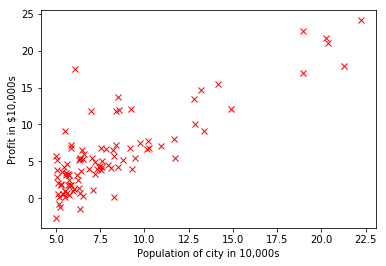

In [3]:
import matplotlib.pyplot as plt

def plotData(x, y):
    plt.plot(x, y, 'rx')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of city in 10,000s')
    plt.show()

plotData(X, y)

## 2.2 Gradient Descent

### 2.2.2 Implementation

In [4]:
# Add a column of ones to X
X = np.column_stack((np.ones(m), X))
print(X[:5,:])

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]


In [5]:
# Initialise fitting parameters
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost J(θ)

In [6]:
def computeCost(X, y, theta):
    J = 0
    m = len(y)
    
    for i in range(m):
        J += float((np.dot(theta.T, X[i,:]) - y[i]))**2

    J = J/(2*m)
    return J

# Expected cost value (approx) 32.07
computeCost(X, y, theta)

32.072733877455654

In [7]:
# Expected cost value (approx) 54.24
theta = np.array([[-1],[2]])
computeCost(X, y, theta)

54.24245508201238

### 2.2.4 Gradient descent

In [8]:
theta = np.zeros((2,1))

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for iteration in range(0, num_iters):
        delta = np.zeros((2, 1))
        for j in range(2):
            for i in range(m):
                delta[j] += (np.dot(theta.T, X[i,:]) - y[i]) * X[i,j]
            delta[j] = delta[j] / m
        
        theta = theta - alpha * delta
        J_history[iteration] = computeCost(X, y, theta)
        
    return theta

# Expected theta values (approx) (-3.6303, 1.1664)
theta = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

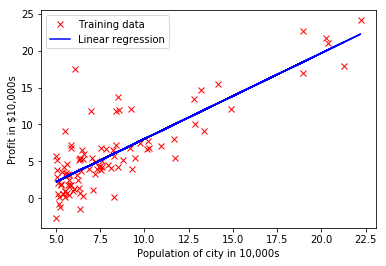

In [9]:
# Plot the linear fit
plt.plot(X[:,1], y, 'rx')
plt.plot(X[:,1], np.dot(X, theta), 'b-')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.legend(['Training data','Linear regression'])
plt.show()

In [10]:
# Predict values for population sizes of 35,000 and 70,000

predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of $%.0f.' % float(predict1*10000));

predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of $%.0f.' % float(predict2*10000));

For population = 35,000, we predict a profit of $4520.
For population = 70,000, we predict a profit of $45342.


## 2.4 Visualizing J(θ)

In [11]:
# Grid over which we will calculate J
theta0_vals = np.arange(-10, 10.2, 0.2)
theta1_vals = np.arange(-1, 4.05, 0.05)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j] = computeCost(X, y, theta)
        
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
# Meshgrids are the transpose of Cartesian co-ordinates (see https://goo.gl/Gv3f8H),
# so transpose J to convert to Cartesian
J_vals = J_vals.T

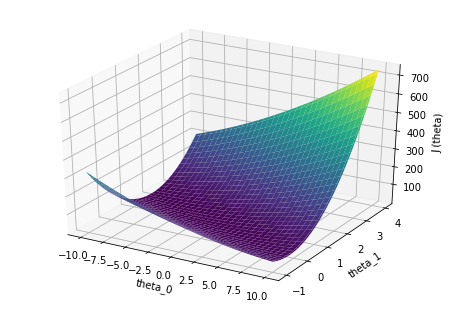

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(theta0, theta1, J_vals, cmap=cm.viridis)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J (theta)')
plt.show()

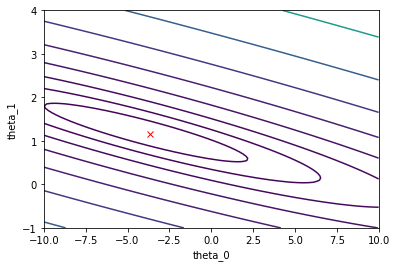

In [13]:
plt.contour(theta0, theta1, J_vals, np.logspace(-2, 3, 20))
theta = np.array([[-3.63029144],[1.16636235]])
plt.plot(theta[0], theta[1], 'rx')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()